<a href="https://colab.research.google.com/github/BrayCal/P2P/blob/main/TareaMetodos3Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea Programada 1
Médotos matematicos de Física III FS-0633

Merilyn Mayorga Picado. C14589

Bryton Ramírez Calderón. C06300


## Problema #1

 Primeramente generamos una función de dos escalones que nos permitió crear dos segmentos de valor 1, cada uno con valores iniciales de ancho "a" y una separación "d" entre los centros de los escalones.

Además se definió su dominio de valores espaciales con la variable x. A esta función se le calculó 1. La transformada de Fourier FFT, con una función fft, con una normalización adecuada y asegurando obtener las unidades adecuadas mediante una multiplicación de la resolución espacial dx. 2. El espectro de potencia mediante el cuadrado del valor absoluto de los valores complejos de dicha transformada de Fourier.

Finalmente se hizo una representación en gráficos usando matplotlib en un primer gráfico se muestra la función que definimos al inicio, en el segundo el espectro de potencia y el tercer grafico la variación del espectro de potencia para distintos valores de ancho en los escalones. Para que los gráficos sean comprendidos por el visualizador, se hizo uso de etiquetas, títulos y cuadrículas.

### Calcule la transformada de Fourier numérica de f(x)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

# Parámetros
N = 4096  # Número de puntos (aumentado para mejor resolución)
L = 20.0  # Rango espacial [-L/2, L/2]
x = np.linspace(-L/2, L/2, N, endpoint=False)
dx = x[1] - x[0]  # Resolución espacial

# 1.1 Función de dos escalones (ancho 'a' y separación 'd')
def double_rect(x, a, d):
    """Función con dos escalones de ancho 'a' separados por 'd'"""
    return np.where((x >= -d/2 - a/2) & (x <= -d/2 + a/2), 1, 0) + \
           np.where((x >= d/2 - a/2) & (x <= d/2 + a/2), 1, 0)

# Valores iniciales
a = 1.0  # Ancho de cada escalón
d = 3.0  # Separación entre centros

# Crear función
f_x = double_rect(x, a, d)

# Calcular FFT (con normalización adecuada)
F_k = fftshift(fft(f_x, norm="ortho")) * dx  # Multiplicar por dx para unidades correctas
k = fftshift(fftfreq(N, dx)) * 2 * np.pi  # Frecuencias angulares

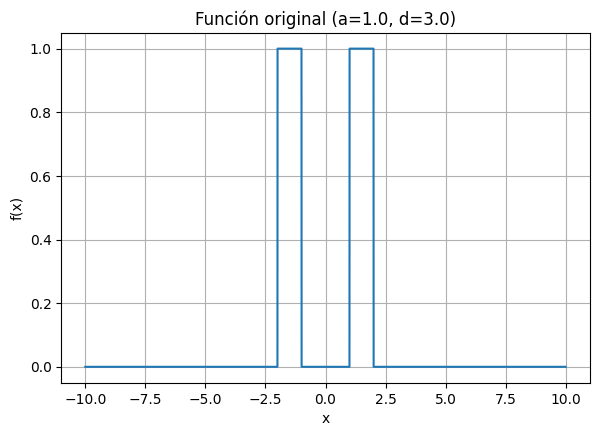

In [ ]:
# Gráficos
plt.figure(figsize=(15, 10))

# Función original
plt.subplot(2, 2, 1)
plt.plot(x, f_x)
plt.title(f'Función original (a={a}, d={d})')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

### Graficque la funcion de A(k) = F(k)* el conjugado de la misma

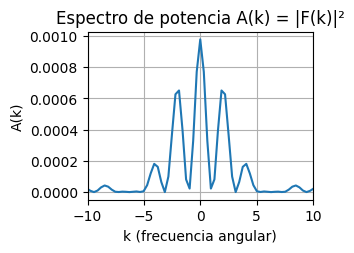

In [ ]:
# 1.2 Calcular A(k) = |F(k)|²
A_k = np.abs(F_k)**2

# Espectro de potencia A(k)
plt.subplot(2, 2, 3)
plt.plot(k, A_k)
plt.title('Espectro de potencia A(k) = |F(k)|²')
plt.xlabel('k (frecuencia angular)')
plt.ylabel('A(k)')
plt.xlim(-10, 10)
plt.grid()

### Grafique la funcion A(k) cuando se cambia el ancho de ambos escalones

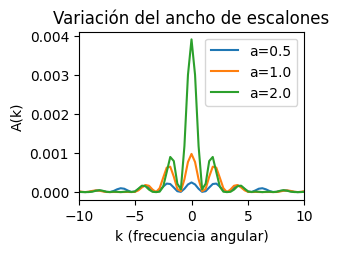

In [ ]:
plt.subplot(2, 2, 4)
for a_new in [0.5, 1.0, 2.0]:
    f_x_var = double_rect(x, a_new, d)
    F_k_var = fftshift(fft(f_x_var, norm="ortho")) * dx
    A_k_var = np.abs(F_k_var)**2
    plt.plot(k, A_k_var, label=f'a={a_new}')

plt.title('Variación del ancho de escalones')
plt.xlabel('k (frecuencia angular)')
plt.ylabel('A(k)')
plt.xlim(-10, 10)
plt.legend()

###Considere una onda luminosa plana que pasa por dos rendijas. ¿Qué relación tiene la función A(k) que usted calculó arriba con el patrón que la luz hace en una pared muy lejana?

Para hallar la relación, es importante recordar el experimento de Young. Se tienen dos rendijas y una pantalla, cuando la luz pasa por las dos rendijas se generan dos ondas que viajan hasta la pantalla. Estas ondas pueden sumarse (interferencia constructiva, generando luz) o restarse (interferencia destructiva, generando oscuridad).
El patrón de franjas claras y oscuras que se ha generado en la pantalla se puede describir con la función A(k) que se calculó. Además la función sinc representa la difracción de cada rendija, mientras que la función cos  está ligada a la interferencia entre las dos ondas.

La ecuación que se está resolviendo con este ejercicio es:

\begin{equation}
I(\phi) = I_0 \cos^2 \left( \frac{d \pi \sin \phi}{\lambda} \right) \operatorname{sinc}^2 \left( \frac{\pi a \sin \phi}{\lambda} \right)
\end{equation}
Describiendo asi la intensidad de la luz en la pantalla en un ángulo phi.


## Problema #2

Definimos una función en coordenadas cartesianas de radio a que toma dos valores: 1 dentro del círculo y 0 fuera del círculo, además se aseguró que la matriz es de tipo float.  A esta función se le calculó la transformada de Fourier FFT con una función **fft2**, y el espectro de potencia mediante el cuadrado del valor absoluto de los valores complejos de dicha transformada de Fourier, para los números de onda **kx** y **ky** se utilizó fftshift para centrar en **k**=0. Finalmente se hicieron las representaciones de los gráficos usando **imshow**




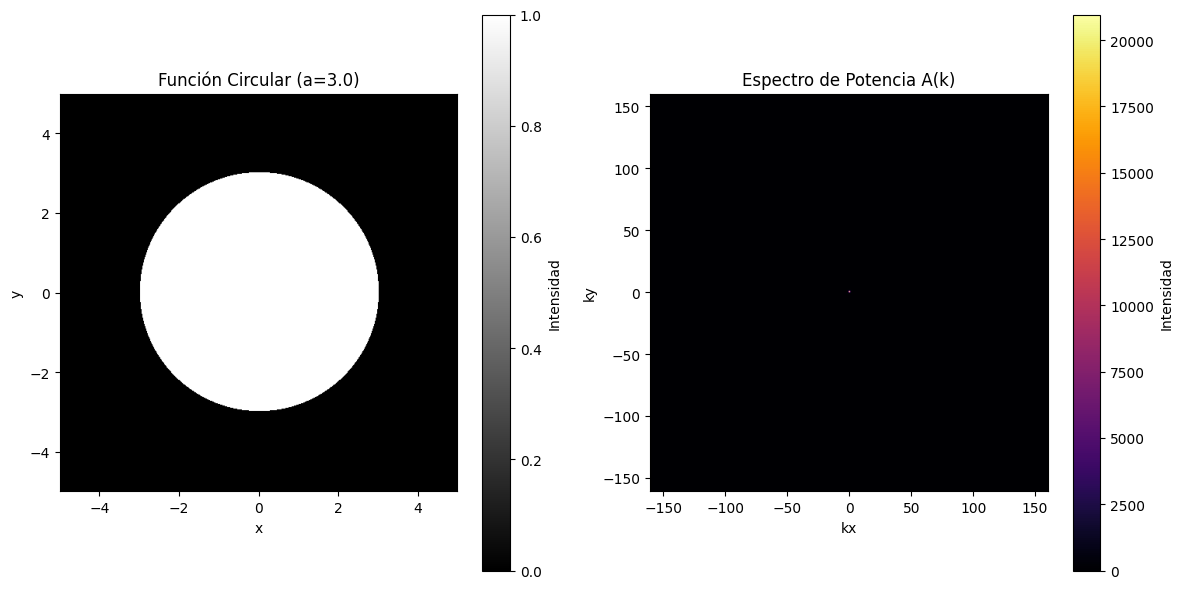

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift

# Parámetros
N = 512  # Número de puntos en cada dirección
L = 10.0  # Rango espacial [-L/2, L/2]
x = np.linspace(-L/2, L/2, N, endpoint=False)
y = np.linspace(-L/2, L/2, N, endpoint=False)
X, Y = np.meshgrid(x, y)

# Definir la función circular
a = 3  # Radio del círculo
f_r = np.where(X**2 + Y**2 <= a**2, 1.0, 0.0)  # Asegurar que la matriz es de tipo float

# Calcular la Transformada de Fourier bidimensional
F_k = fftshift(fft2(f_r, norm="ortho"))
kx = fftshift(np.fft.fftfreq(N, d=(x[1]-x[0]))) * 2 * np.pi
ky = fftshift(np.fft.fftfreq(N, d=(y[1]-y[0]))) * 2 * np.pi
KX, KY = np.meshgrid(kx, ky)
# Espectro de potencia
A_k = np.abs(F_k)**2

# Graficos
plt.figure(figsize=(12, 6))

# Función original
plt.subplot(1, 2, 1)
plt.imshow(f_r, extent=[-L/2, L/2, -L/2, L/2], cmap='gray', origin='lower')
plt.title('Función Circular (a=3.0)')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Intensidad')

# Espectro de potencia A(k)
plt.subplot(1, 2, 2)
plt.imshow(A_k, extent=[kx.min(), kx.max(), ky.min(), ky.max()], cmap='inferno', origin='lower')
plt.title('Espectro de Potencia A(k)')
plt.xlabel('kx')
plt.ylabel('ky')
plt.colorbar(label='Intensidad')

plt.tight_layout()
plt.show()

## Problema #3

Primero debemos subir los archivos txt de la tarea, puesto que estos poseen los datos que deseamos analizar, los cargamos gracias a numpy y utilizando matplot graficamos los datos como lo solicita el 3.1
Debido a que debemos encontrar las transformadas llamamos a scipy para facilitar el proceso, además, nos ayudará a encontrar las frecuencias dominantes con con scipy.signal.

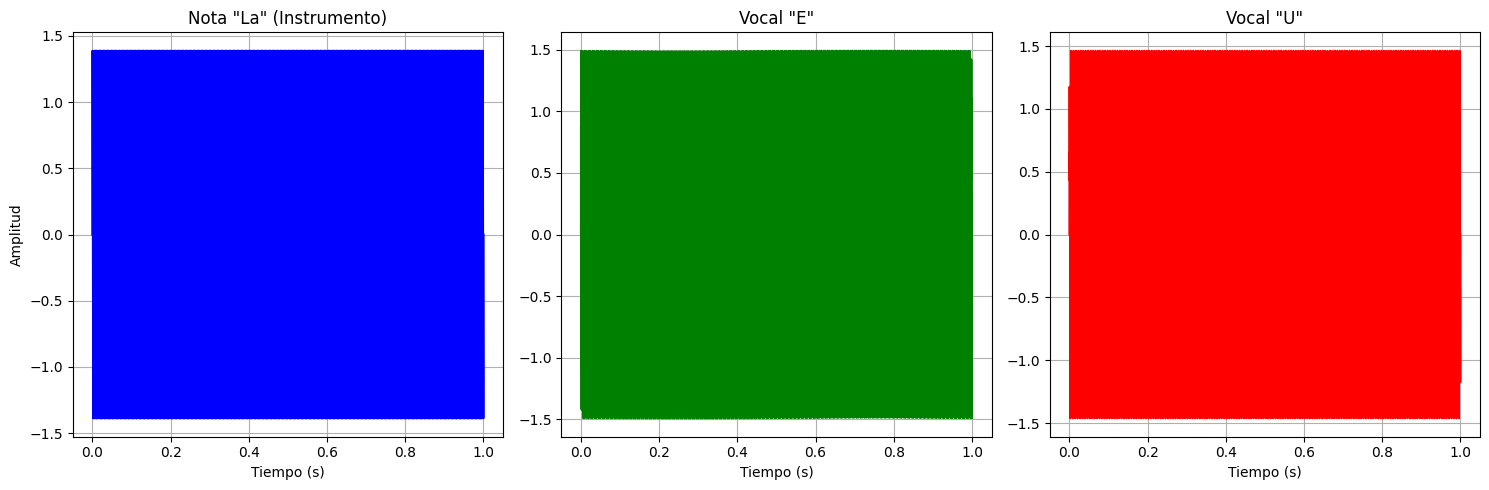

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

# Cargar los archivos
signal_la = np.loadtxt('signal1.txt')  # Nota "La"
signal_e = np.loadtxt('vocalE.txt')    # Vocal "E"
signal_u = np.loadtxt('vocalU.txt')    # Vocal "U"
# Configuración
sample_rate = 44100  # Hz
duration = 1.0       # segundos
t = np.linspace(0, duration, len(signal_la), endpoint=False)  # Eje de tiempo

# Gráficas
plt.figure(figsize=(15, 5))

# Nota "La"
plt.subplot(1, 3, 1)
plt.plot(t, signal_la, color='blue')
plt.title('Nota "La" (Instrumento)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()

# Vocal "E"
plt.subplot(1, 3, 2)
plt.plot(t, signal_e, color='green')
plt.title('Vocal "E"')
plt.xlabel('Tiempo (s)')
plt.grid()

# Vocal "U"
plt.subplot(1, 3, 3)
plt.plot(t, signal_u, color='red')
plt.title('Vocal "U"')
plt.xlabel('Tiempo (s)')
plt.grid()

plt.tight_layout()
plt.show()

3.2 Calcule la transformada de Fourier de cada señal

Definimos la funcion para hallar las transfomardas y la invocamos para cada uno de los 3 archivos dados, de esta forma las obtenemos, aunque no se se solicita que las grafiquemos.

In [9]:
def compute_fft(signal, sample_rate):
    N = len(signal)
    fft_result = fft(signal)
    freqs = fftfreq(N, d=1/sample_rate)
    magnitude = np.abs(fft_result)[:N//2]  # Solo frecuencias positivas
    positive_freqs = freqs[:N//2]
    return positive_freqs, magnitude

# Calcular FFT para cada señal
freqs_la, mag_la = compute_fft(signal_la, sample_rate)
freqs_e, mag_e = compute_fft(signal_e, sample_rate)
freqs_u, mag_u = compute_fft(signal_u, sample_rate)

3.3 ¿Cuales son las frecuencias de cada señal?

Al igual que en el inciso anterior, definimos una funcion para hallar los picos de frecuencias con esto encontramos los Hz de cada archivo.

In [11]:
def freq(freqs, magnitude, threshold=0.1):
    peaks, _ = find_peaks(magnitude, height=threshold * max(magnitude))
    return freqs[peaks]

# Encontrar frecuencias
f_la = freq(freqs_la, mag_la)
f_e = freq(freqs_e, mag_e)
f_u = freq(freqs_u, mag_u)

print("Nota 'La' - Frecuencias (Hz):", f_la[:5])
print("Vocal 'E' - Frecuencias (Hz):", f_e[:5])
print("Vocal 'U' - Frecuencias (Hz):", f_u[:5])

Nota 'La' - Frecuencias (Hz): [ 440.  880. 1320.]
Vocal 'E' - Frecuencias (Hz): [ 500. 2300.]
Vocal 'U' - Frecuencias (Hz): [320. 800.]


## Problema #4

Para este problema, al igual que en los anteriores, utilizamos SciPy para realizar las transformadas de Fourier. Asimismo, podemos usar el mismo paquete para obtener tanto la serie discreta del seno como la del coseno.
debido a que tenemos cuatro funciones distintas, se utilizará un bucle for para mayor facilidad. Estas funciones se graficarán junto con sus respectivas transformadas de Fourier, seno y coseno.

4.1 Graficamos las funciones anteriores

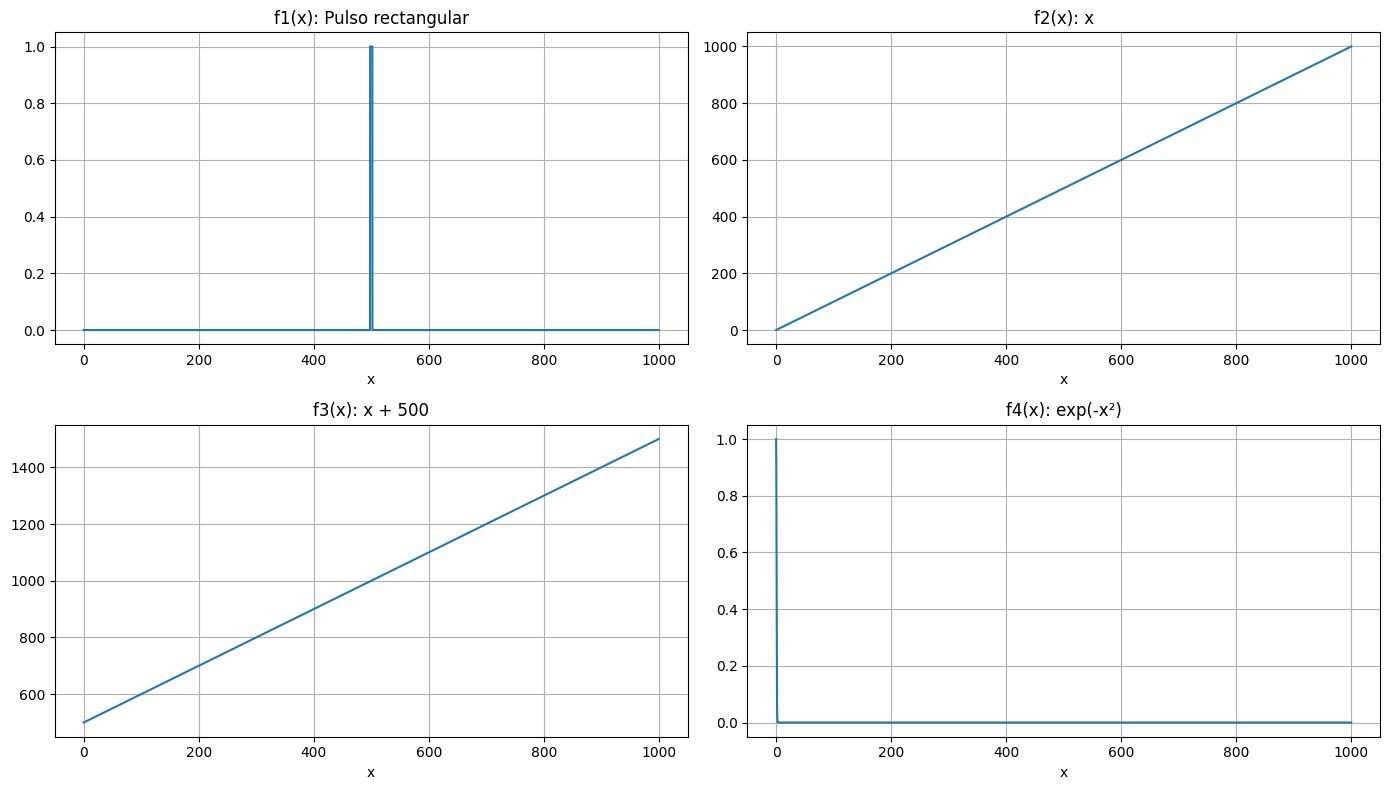

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, dst, dct

# Configuración
N = 10000  # Número de puntos
x = np.linspace(0, 1000, N, endpoint=False)  # Dominio espacial

# Definición de las funciones
def f1(x):
    return np.where(np.abs(x - 500) <= 2, 1, 0)  # Pulso centrado en x=500

def f2(x):
    return x

def f3(x):
    return x + 500

def f4(x):
    return np.exp(-x**2)

# Lista de funciones y sus nombres
funcs = [f1, f2, f3, f4]
names = ['f1(x): Pulso rectangular', 'f2(x): x', 'f3(x): x + 500', 'f4(x): exp(-x²)']

# 4.1: Graficar todas las funciones
plt.figure(figsize=(14, 8))
for i, (func, name) in enumerate(zip(funcs, names), 1):
    plt.subplot(2, 2, i)
    plt.plot(x, func(x))
    plt.title(name)
    plt.xlabel('x')
    plt.grid()
plt.tight_layout()
plt.show()

4.2 Calcule la transformada de Fourier de cada, 4.3

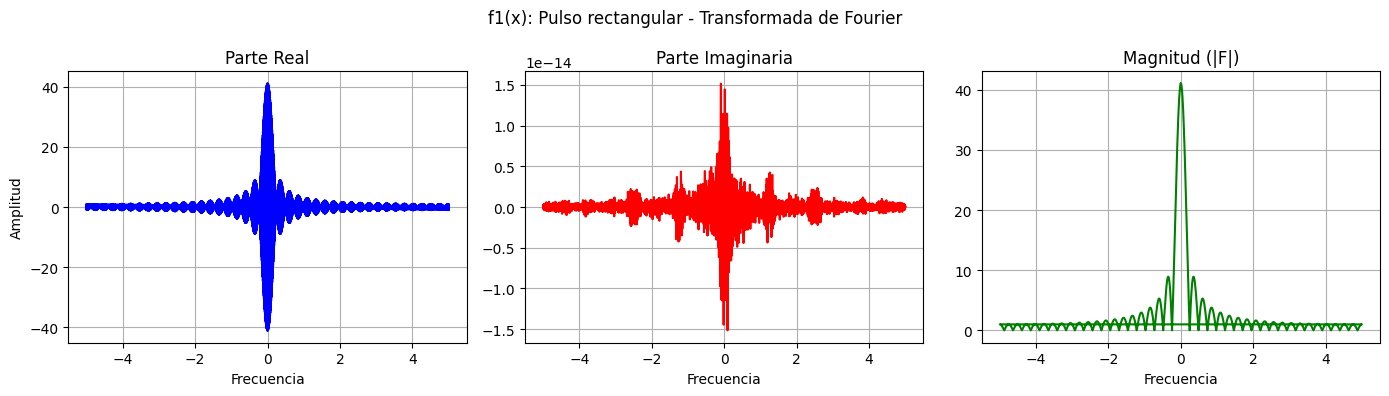

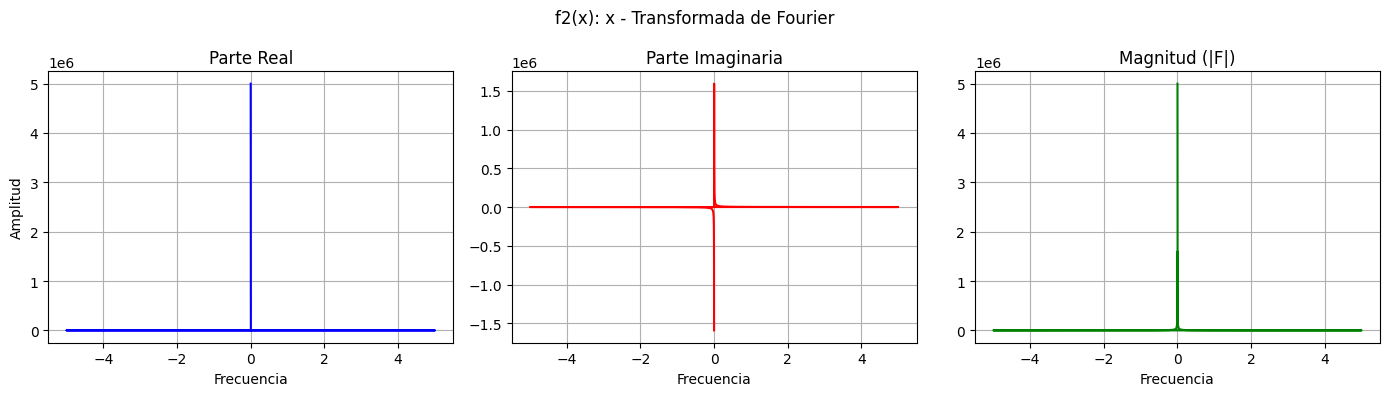

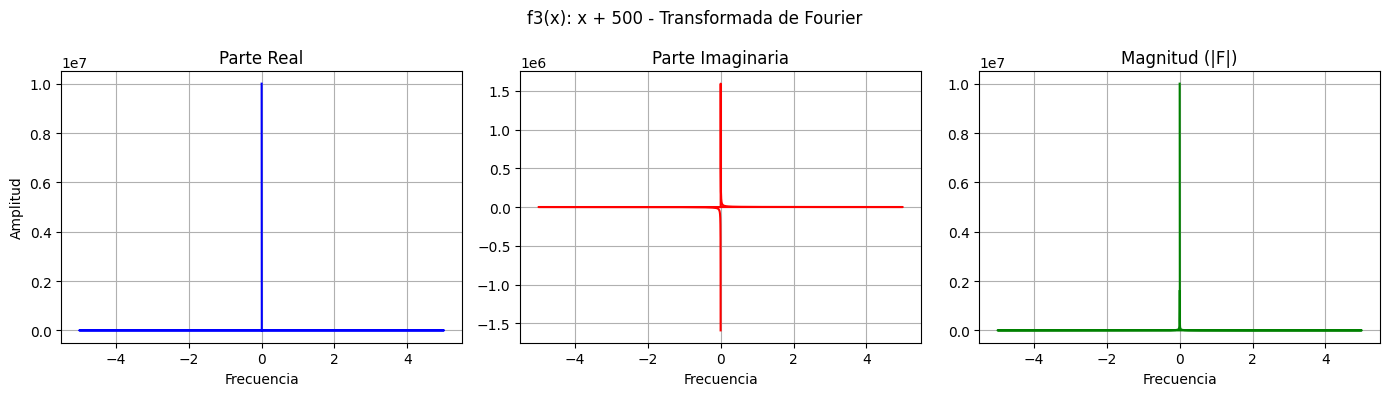

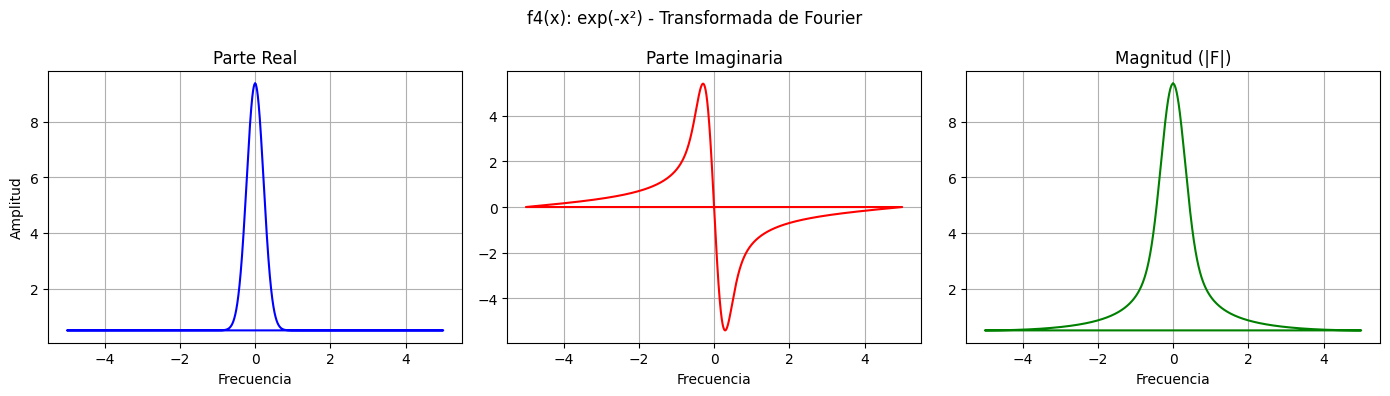

In [ ]:
for i, (func, name) in enumerate(zip(funcs, names), 1):
    y = func(x)

    # Transformadas
    F = fft(y)
    S = dst(y, type=1)  # DST-I
    C = dct(y, type=1)  # DCT-I

    # Dominio de frecuencias (para FFT)
    freq = np.fft.fftfreq(N, d=(x[1]-x[0]))

    # 4.3: Gráfica de FFT (parte real, imaginaria, magnitud)
    plt.figure(figsize=(14, 4))
    plt.suptitle(f'{name} - Transformada de Fourier')

    plt.subplot(1, 3, 1)
    plt.plot(freq, np.real(F), label='Real', color='blue')
    plt.xlabel('Frecuencia')
    plt.ylabel('Amplitud')
    plt.title('Parte Real')
    plt.grid()

    plt.subplot(1, 3, 2)
    plt.plot(freq, np.imag(F), label='Imaginaria', color='red')
    plt.xlabel('Frecuencia')
    plt.title('Parte Imaginaria')
    plt.grid()

    plt.subplot(1, 3, 3)
    plt.plot(freq, np.abs(F), label='Magnitud', color='green')
    plt.xlabel('Frecuencia')
    plt.title('Magnitud (|F|)')
    plt.grid()

    plt.tight_layout()
    plt.show()

4.4 4.3 Gráficas de transformada de seno y coseno

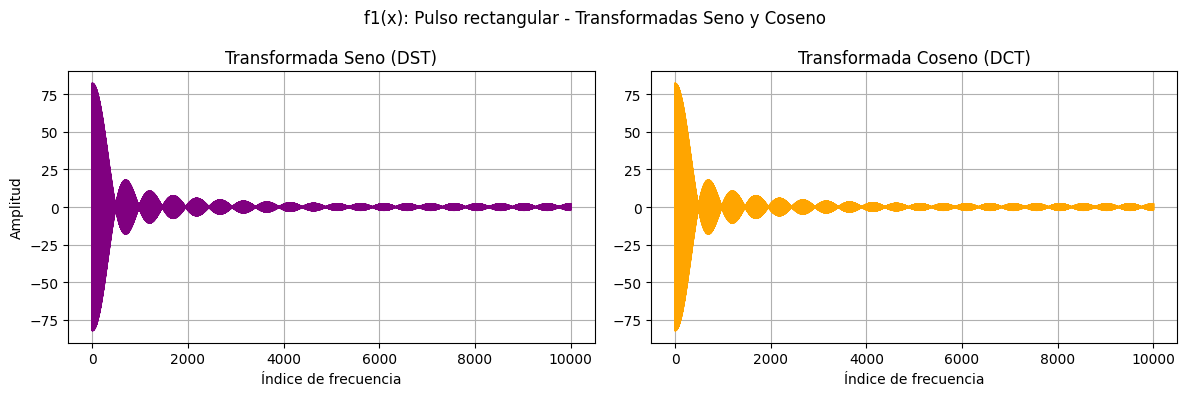

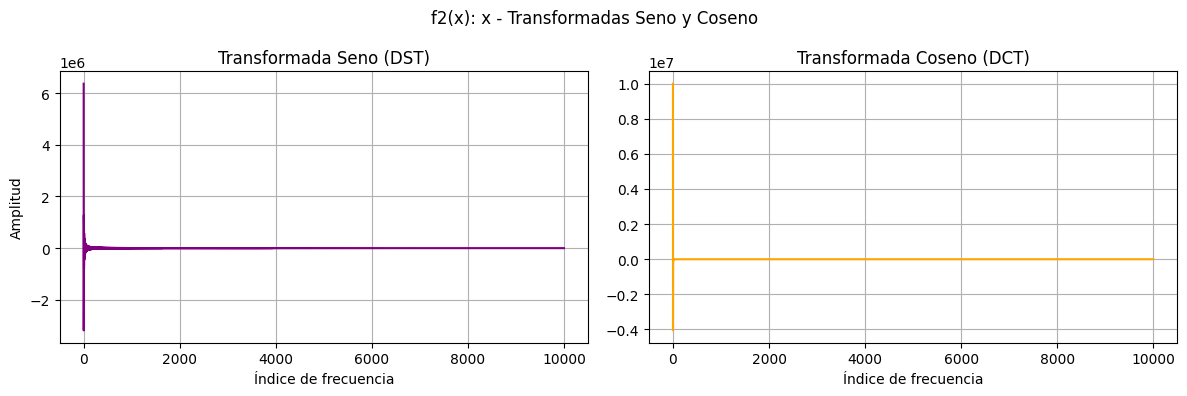

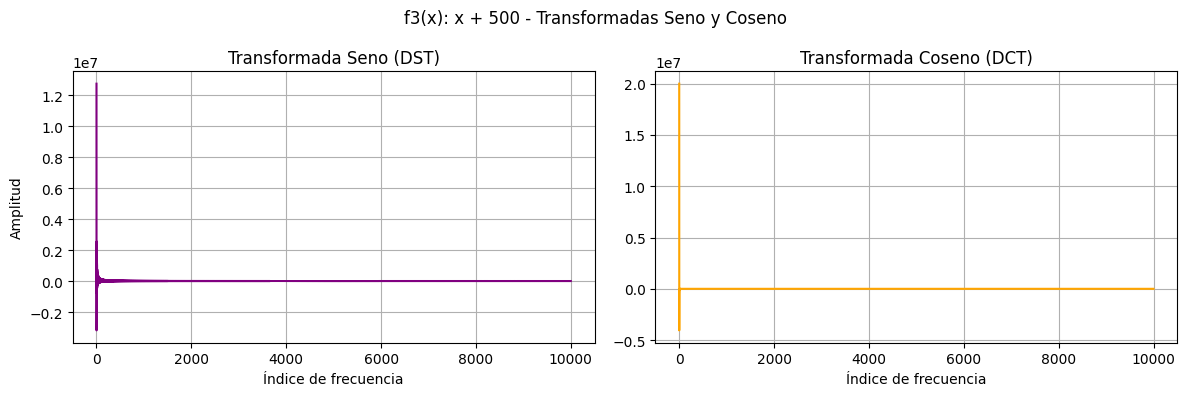

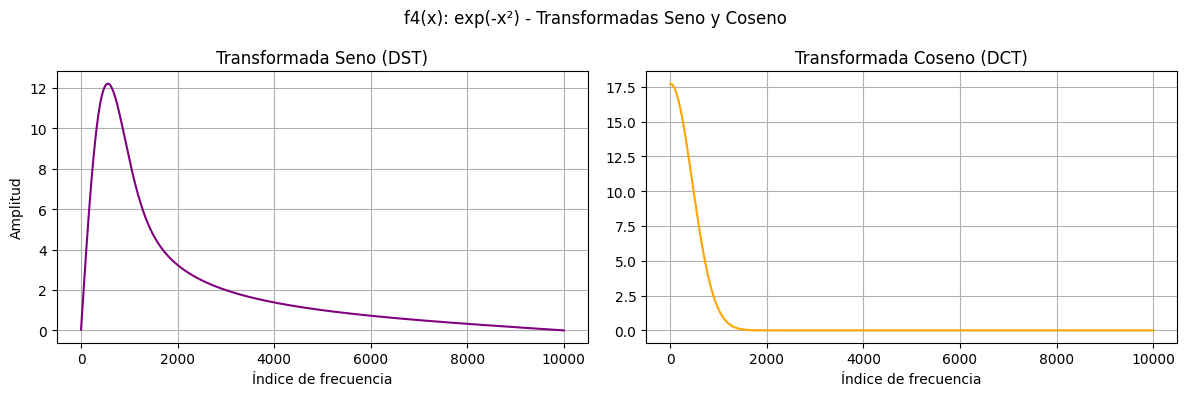

In [ ]:
for i, (func, name) in enumerate(zip(funcs, names), 1):
    y = func(x)

    # Transformadas
    F = fft(y)
    S = dst(y, type=1)  # DST-I
    C = dct(y, type=1)  # DCT-I

    plt.figure(figsize=(12, 4))
    plt.suptitle(f'{name} - Transformadas Seno y Coseno')

    plt.subplot(1, 2, 1)
    plt.plot(S, label='DST', color='purple')
    plt.xlabel('Índice de frecuencia')
    plt.ylabel('Amplitud')
    plt.title('Transformada Seno (DST)')
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(C, label='DCT', color='orange')
    plt.xlabel('Índice de frecuencia')
    plt.title('Transformada Coseno (DCT)')
    plt.grid()

    plt.tight_layout()
    plt.show()

###Problema 5

Finalmente para este problema lo que hicimos fue generar tres matrices

5.1 Construya tres arrays bidimensionales con 30 entradas en cada dirección, y llénelos de
ceros.

In [ ]:
array1 = np.zeros((30, 30))
array2 = np.zeros((30, 30))
array3 = np.zeros((30, 30))

5.2 Cambie las siguientes entradas a 1:
array1[5,5], array1[5,10]
array2[5,5], array2[25,5]
array3[10,15], array3[25,20]

In [ ]:
array1[5, 5] = 1
array1[5, 10] = 1
array2[5, 5] = 1
array2[25, 5] = 1
array3[10, 15] = 1
array3[25, 20] = 1

5.3 Calcule la transformada bidimensional de Fourier para cada array

In [ ]:
fft_array1 = np.fft.fft2(array1)
fft_array2 = np.fft.fft2(array2)
fft_array3 = np.fft.fft2(array3)

5.4 Grafique las partes reales e imaginarias de cada array transformado (imshow o
pcolormesh en Python)

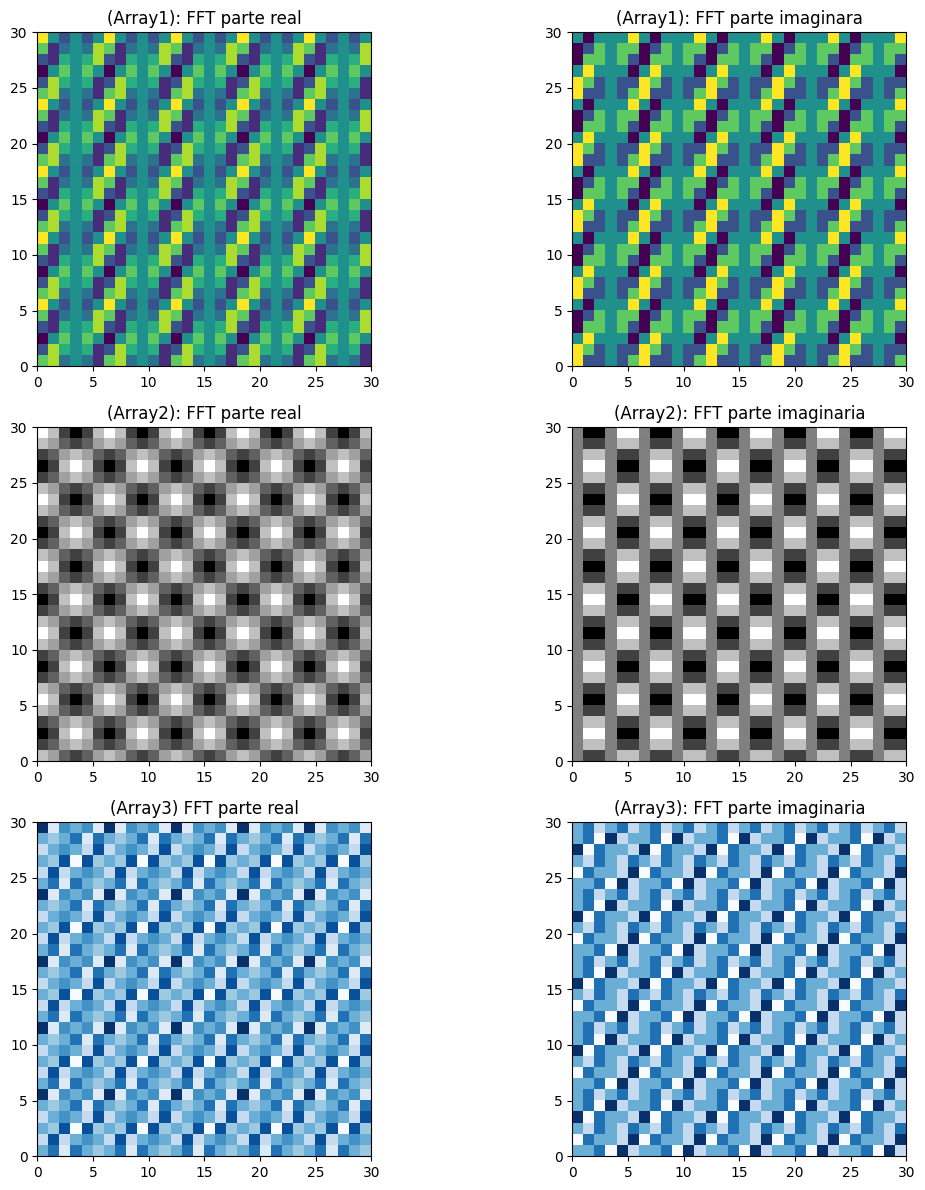

In [ ]:
real_array1 = np.real(fft_array1)
imag_array1 = np.imag(fft_array1)

real_array2 = np.real(fft_array2)
imag_array2 = np.imag(fft_array2)

real_array3 = np.real(fft_array3)
imag_array3 = np.imag(fft_array3)


fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# array1
axes[0, 0].imshow(real_array1, cmap='viridis', extent=[0, 30, 0, 30])
axes[0, 0].set_title('(Array1): FFT parte real')
axes[0, 1].imshow(imag_array1, cmap='viridis', extent=[0, 30, 0, 30])
axes[0, 1].set_title('(Array1): FFT parte imaginara')

# array2
axes[1, 0].imshow(real_array2, cmap='gray', extent=[0, 30, 0, 30])
axes[1, 0].set_title('(Array2): FFT parte real')
axes[1, 1].imshow(imag_array2, cmap='gray', extent=[0, 30, 0, 30])
axes[1, 1].set_title('(Array2): FFT parte imaginaria')

# array3
axes[2, 0].imshow(real_array3, cmap='Blues', extent=[0, 30, 0, 30])
axes[2, 0].set_title('(Array3) FFT parte real')
axes[2, 1].imshow(imag_array3, cmap='Blues', extent=[0, 30, 0, 30])
axes[2, 1].set_title('(Array3): FFT parte imaginaria')

plt.tight_layout()
plt.show()

5.5 Basado en los resultados, conteste: ¿Qué pasa con la transformada cuando las entradas
que son 1 ("puntos") se acercan o alejan? ¿Qué pasa cuando esos puntos se rotan 90º? ¿Qué pasa si
esos puntos se mueven en un ángulo distinto?

En base a los resultados se puede observar como la transformada sufre los siguientes cambios:
1. Se comprime en frecuencia cuando los puntos estan mas alejados entre si.
2. Si los puntos por el contrario estan mas cerca entre ellos, se observa una transformada mas expandida.
3. En caso de aplicarle un rotacion de 90º a los puntos, la transformada también sufrira la rotación en igual dirección. Es importante entender que la transformada 2D está analizando las frecuencias en todas las direcciones por ende si hay cambios, los componentes de frecuencia también se veran afectados.
4. Si los puntos se mueven en un angulo distinto, la transformada sufre un cambio en su orientación, inclinandose en dirección perpendicular.